based on https://github.com/amdevine/ggi-gardens-photos/blob/master/download-inaturalist-images.ipynb 

## Test accessa iNaturalist

In [7]:
import requests
import matplotlib
import pandas
from urllib.parse import urlencode
import json

# Helpful site: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations
# look for the taxon ids and place ids in the urls on the web site.

q = {
    "taxon_id": 36514, # green anole
    "d1": "2018-01-01",
    "d2": "2020-06-30",
    "order": "desc",
    "order_by": "created_at",
    "place_id": 30, # north carolina
    "per_page": 200,
}
url = "https://api.inaturalist.org/v1/observations?"

z = pandas.DataFrame()

page = 1
while True:
    q['page'] = page
    r = requests.get(url, params = q)
    
    results = r.json()["results"]
    z = pandas.concat([z, pandas.DataFrame(r.json()["results"])])

    if r.json()["results"] == []:
        print("no more results, stopping")
        break
    if page > 999:
        break
        
    if page == 1:
        num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
        print(r.json()["total_results"])
        print(num_pages)
        print("Results:", r.json()["total_results"], ", ", num_pages, " pages total")
    print("Retrieving page ", page)
    page += 1

z['created_at'] = pandas.to_datetime(z['created_at'])
z = z.set_index('created_at')

1621
9
Results: 1621 ,  9  pages total
Retrieving page  1
Retrieving page  2
Retrieving page  3
Retrieving page  4
Retrieving page  5
Retrieving page  6
Retrieving page  7
Retrieving page  8
Retrieving page  9
no more results, stopping


In [12]:
#
# This shows a chart of the count of observations by month
# 
z["uri"]

created_at
2020-05-14 16:40:08-04:00    https://www.inaturalist.org/observations/45907222
2020-05-14 16:03:59-04:00    https://www.inaturalist.org/observations/45903428
2020-05-14 16:03:30-04:00    https://www.inaturalist.org/observations/45903388
2020-05-14 11:43:03-04:00    https://www.inaturalist.org/observations/45877952
2020-05-14 09:47:24-04:00    https://www.inaturalist.org/observations/45868514
                                                   ...                        
2018-03-19 15:36:41-04:00    https://www.inaturalist.org/observations/10313010
2018-03-19 14:03:17-04:00    https://www.inaturalist.org/observations/10311478
2018-03-17 14:00:03-04:00    https://www.inaturalist.org/observations/10275391
2018-03-13 15:58:55-04:00    https://www.inaturalist.org/observations/10222515
2018-02-25 15:44:25-05:00     https://www.inaturalist.org/observations/9993925
Name: uri, Length: 1621, dtype: object

In [14]:
z

,quality_grade,time_observed_at,taxon_geoprivacy,annotations,uuid,observed_on_details,id,cached_votes_total,identifications_most_agree,created_at_details,...,project_observations,photos,observation_photos,faves,non_owner_ids,out_of_range,id_please,context_user_geoprivacy,context_geoprivacy,context_taxon_geoprivacy
created_at,,,,,,,,,,,,,,,,,,,,,
2020-05-14 16:40:08-04:00,research,2020-05-14T16:11:29-04:00,open,[],fd737c46-002e-400b-a3c6-9093285e9730,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",45907222,0,True,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",...,[],"[{'id': 72809059, 'license_code': None, 'url':...","[{'id': 67629290, 'position': 0, 'uuid': '3685...",[],"[{'id': 102918443, 'uuid': '3a67267f-590a-4365...",NaN,NaN,NaN,NaN,NaN
2020-05-14 16:03:59-04:00,research,2020-05-14T14:32:00-04:00,open,[],0304a8b4-102f-447e-81be-5bd3276ee612,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",45903428,0,True,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",...,[],"[{'id': 72802327, 'license_code': 'cc-by-nc', ...","[{'id': 67623709, 'position': 0, 'uuid': 'de54...",[],"[{'id': 102918551, 'uuid': '58a7f21e-79d8-4698...",NaN,NaN,NaN,NaN,NaN
2020-05-14 16:03:30-04:00,research,2020-05-14T16:02:17-04:00,open,[],ca118e8a-5938-4a36-b21b-009cb71a9df8,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",45903388,0,True,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",...,[],"[{'id': 72803300, 'license_code': 'cc-by', 'ur...","[{'id': 67623695, 'position': 0, 'uuid': 'bbf4...",[],"[{'id': 102918557, 'uuid': 'cdca10cb-5ba5-4bf5...",NaN,NaN,NaN,NaN,NaN
2020-05-14 11:43:03-04:00,research,2020-05-14T11:36:56-04:00,open,[],ff340e06-8aab-4a23-bcef-988341fe288f,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",45877952,0,True,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",...,[],"[{'id': 72763842, 'license_code': None, 'url':...","[{'id': 67586667, 'position': 0, 'uuid': 'ec45...",[],"[{'id': 102876842, 'uuid': 'ffac63a9-259d-4caa...",NaN,NaN,NaN,NaN,NaN
2020-05-14 09:47:24-04:00,research,2020-05-04T13:30:00-04:00,open,"[{'user_id': 1054891, 'concatenated_attr_val':...",bb6e6166-a2c7-4f22-9261-84cf0a3d507e,"{'date': '2020-05-04', 'week': 19, 'month': 5,...",45868514,0,True,"{'date': '2020-05-14', 'week': 20, 'month': 5,...",...,[],"[{'id': 72748361, 'license_code': None, 'url':...","[{'id': 67572394, 'position': 0, 'uuid': '0fff...",[],"[{'id': 102847005, 'uuid': 'dcaad119-23a4-4b1f...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-19 15:36:41-04:00,research,2018-03-19T15:36:15-04:00,None,[],b82f8d2b-5cbc-415d-bae1-cef71daed164,"{'date': '2018-03-19', 'week': 12, 'month': 3,...",10313010,0,True,"{'date': '2018-03-19', 'week': 12, 'month': 3,...",...,[],"[{'id': 14289118, 'license_code': None, 'url':...","[{'id': 13377578, 'position': 0, 'uuid': '1988...",[],"[{'id': 22910080, 'uuid': '6f1fd1e0-8ed7-444f-...",False,False,None,None,None
2018-03-19 14:03:17-04:00,research,2018-03-18T15:42:44-04:00,None,[],8e934e2e-aef7-4c03-9ecc-796dce3f6d85,"{'date': '2018-03-18', 'week': 11, 'month': 3,...",10311478,0,True,"{'date': '2018-03-19', 'week': 12, 'month': 3,...",...,"[{'id': 16635755, 'uuid': 'ba3d31f9-610a-4dd3-...","[{'id': 14286297, 'license_code': None, 'url':...","[{'id': 13375069, 'position': 0, 'uuid': '9fbd...",[],"[{'id': 22905109, 'uuid': '8d53781b-5d8c-4cd0-...",False,False,None,None,None
2018-03-17 14:00:03-04:00,research,2018-03-17T13:58:22-04:00,None,[],31c652f0-273b-47ba-8a69-b8b32e39a079,"{'date': '2018-03-17', 'week': 11, 'month': 3,...",10275391,0,True,"{'date': '2018-03-17', 'week': 11, 'month': 3,...",...,"[{'id': 16580619, 'uuid': 'b191f83c-5b3d-4132-...","[{'id': 14223892, 'license_code': None, 'url':...","[{'id': 13318388, 'position': 0, 'uuid': '72b6...",[],"[{'id': 22818185, 'uuid': '0f65ec55-67f6-4fae-...",False,False,None,None,None


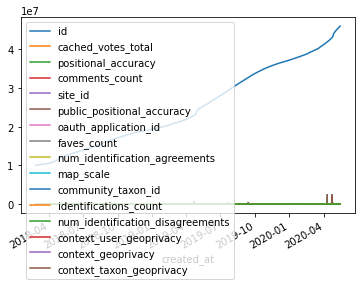

In [15]:
z.plot()